In [1]:
iris2<-iris
iris2$Species<-NULL

In [2]:
kmeans.result <-kmeans(iris2,3)

In [3]:
kmeans.result

K-means clustering with 3 clusters of sizes 38, 50, 62

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     6.850000    3.073684     5.742105    2.071053
2     5.006000    3.428000     1.462000    0.246000
3     5.901613    2.748387     4.393548    1.433871

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 1 1 3 1 1 1 1
[112] 1 1 3 3 1 1 1 1 3 1 3 1 3 1 1 3 3 1 1 1 1 1 3 1 1 1 1 3 1 1 1 3 1 1 1 3 1
[149] 1 3

Within cluster sum of squares by cluster:
[1] 23.87947 15.15100 39.82097
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [7]:
table(iris$Species,kmeans.result$cluster)

            
              1  2  3
  setosa      0 50  0
  versicolor  2  0 48
  virginica  36  0 14

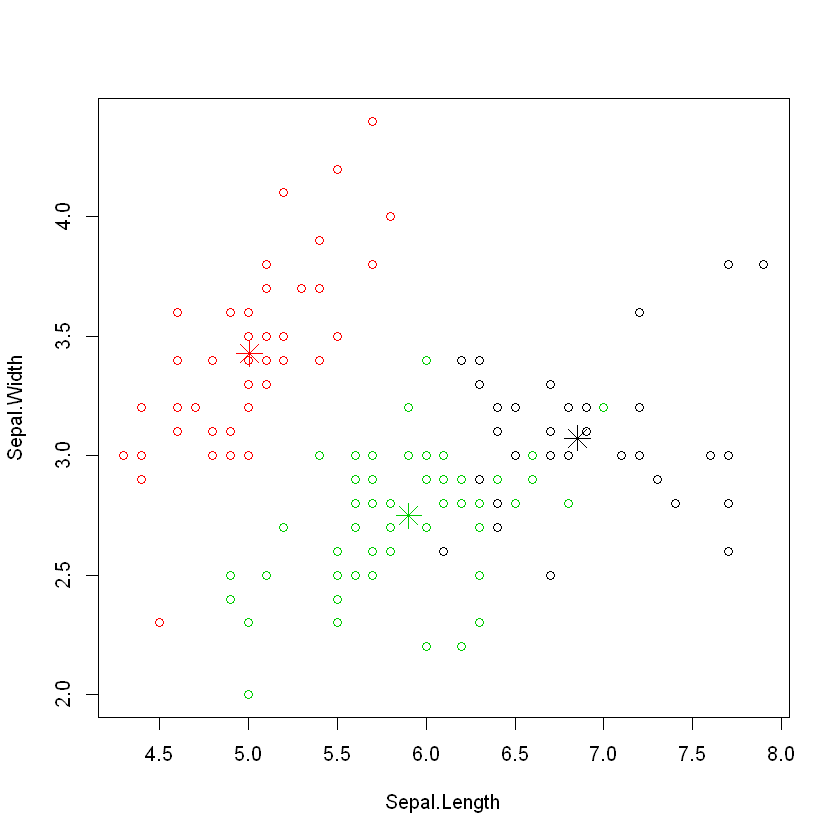

In [13]:
plot(iris2[c("Sepal.Length","Sepal.Width")],col=kmeans.result$cluster)
points(kmeans.result$centers[,c("Sepal.Length","Sepal.Width")],col=1:3,pch=8,cex=2)

In [14]:
library(fpc)

In [15]:
pamk.result<-pamk(iris2)

In [18]:
pamk.result$nc
table(pamk.result$pamobject$clustering,iris$Species)

[1] 2

   
    setosa versicolor virginica
  1     50          1         0
  2      0         49        50

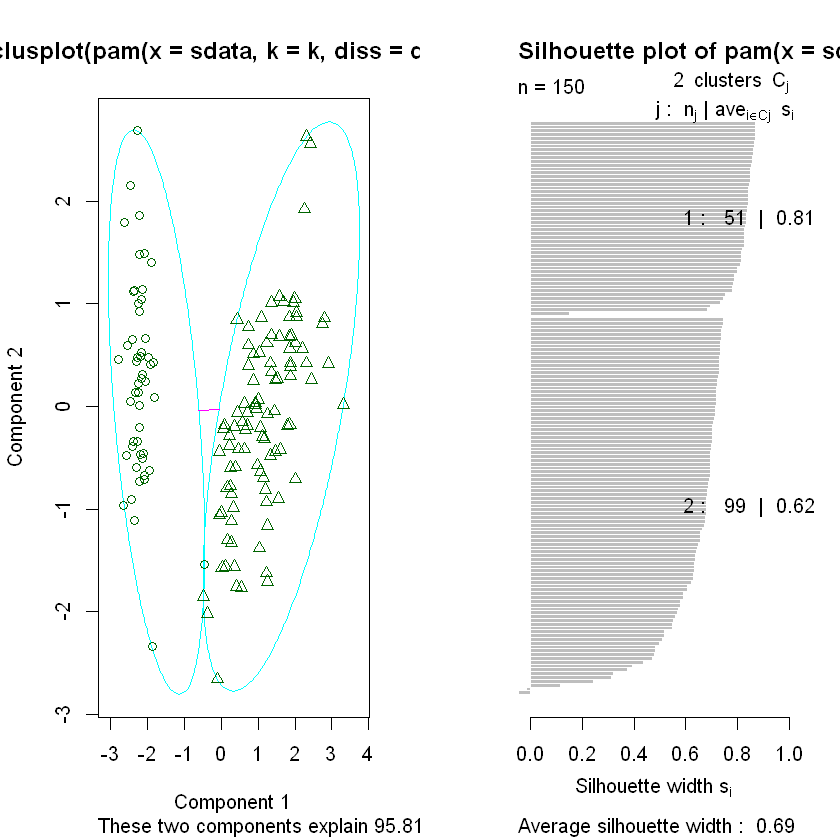

In [25]:
layout(matrix(c(1,2),1,2))
plot(pamk.result$pamobject)
layout(matrix(1))
       

In [33]:
library(cluster)

In [34]:
pam.result<-pam(iris2,3)

In [35]:
str(pam.result)

List of 10
 $ medoids   : num [1:3, 1:4] 5 6 6.8 3.4 2.9 3 1.5 4.5 5.5 0.2 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ id.med    : int [1:3] 8 79 113
 $ clustering: int [1:150] 1 1 1 1 1 1 1 1 1 1 ...
 $ objective : Named num [1:2] 0.671 0.654
  ..- attr(*, "names")= chr [1:2] "build" "swap"
 $ isolation : Factor w/ 3 levels "no","L","L*": 1 1 1
  ..- attr(*, "names")= chr [1:3] "1" "2" "3"
 $ clusinfo  : num [1:3, 1:5] 50 62 38 1.24 1.84 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:5] "size" "max_diss" "av_diss" "diameter" ...
 $ silinfo   :List of 3
  ..$ widths         : num [1:150, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:150] "8" "1" "50" "18" ...
  .. .. ..$ : chr [1:3] "cluster" "neighbor" "sil_width"
  ..$ clus.avg.widths: num [1:3] 0.798 0.417 0.451
  ..$ avg.width      : num 0.553
 $ diss      : NULL
 $ call

In [37]:
pam.result$nc
table(pam.result$clustering,iris$Species)

NULL

   
    setosa versicolor virginica
  1     50          0         0
  2      0         48        14
  3      0          2        36

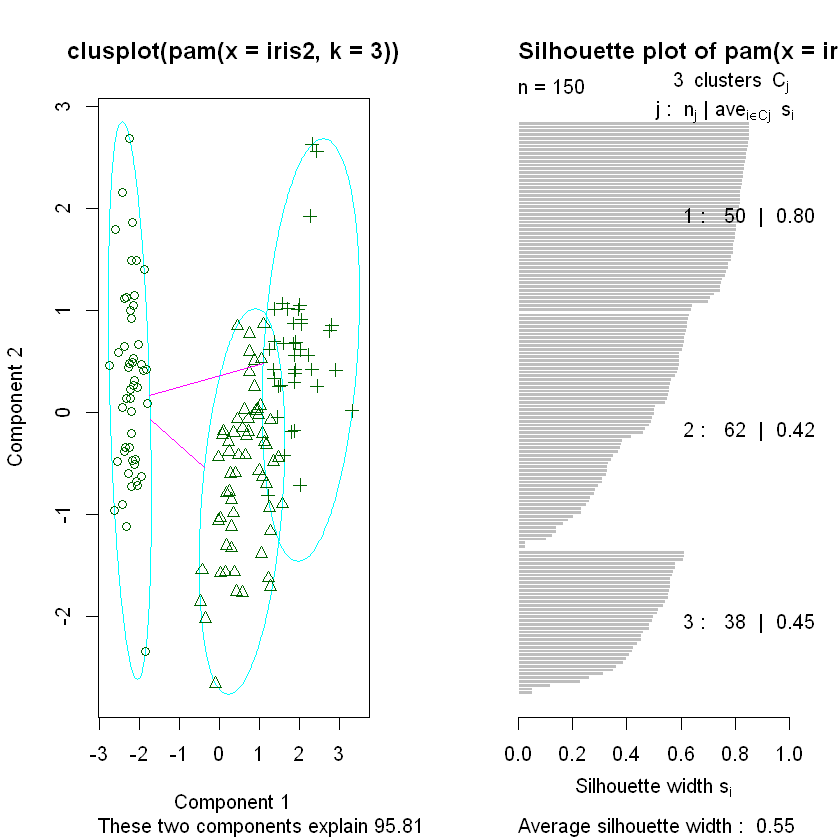

In [38]:
layout(matrix(c(1,2),1,2))
plot(pam.result)
layout(matrix(1))

In [2]:
idx<-sample(1:nrow(iris),40)
iris.sample<-iris[idx,]
iris.sample$Species<-NULL

In [4]:
hc<-hclust(dist(iris.sample),method="ave")

In [5]:
str(hc)

List of 7
 $ merge      : int [1:39, 1:2] -35 -21 -16 -9 1 -6 -26 -2 -14 -1 ...
 $ height     : num [1:39] 0.1 0.1 0.141 0.141 0.195 ...
 $ order      : int [1:40] 5 26 40 38 14 6 16 31 35 39 ...
 $ labels     : chr [1:40] "39" "83" "86" "66" ...
 $ method     : chr "average"
 $ call       : language hclust(d = dist(iris.sample), method = "ave")
 $ dist.method: chr "euclidean"
 - attr(*, "class")= chr "hclust"


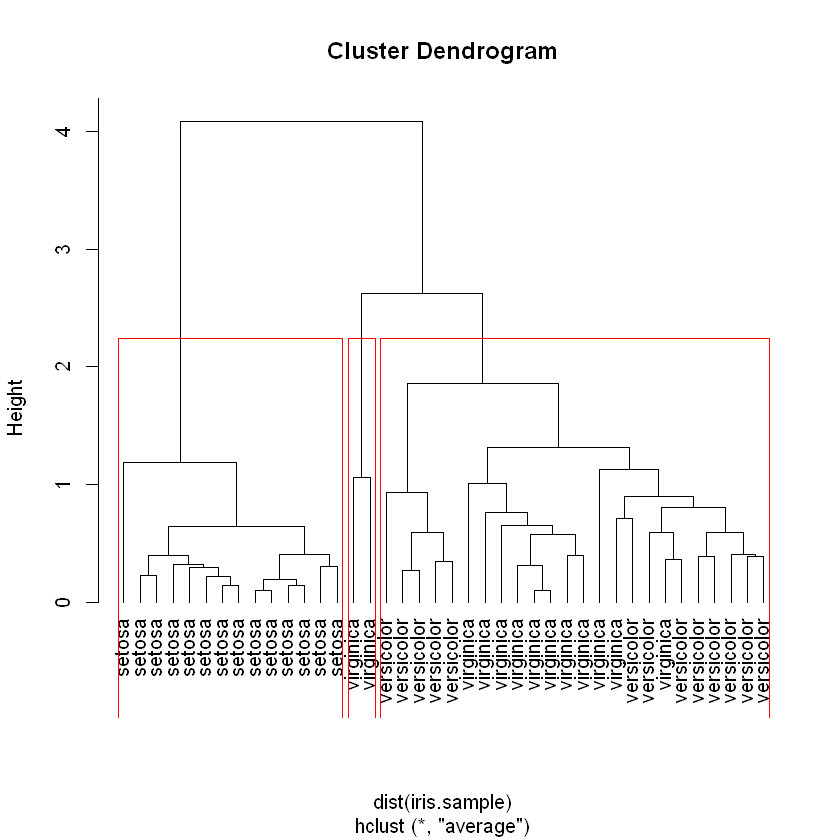

In [13]:
plot(hc,hang=-1,labels=iris$Species[idx])
rect.hclust(hc,k=3)
groups<-cutree(hc,k=3)

In [16]:
library(fpc)

In [18]:
iris2<-iris[-5]
ds<-dbscan(iris2,eps=0.42,MinPts=5)
table(ds$cluster,iris$Species)

   
    setosa versicolor virginica
  0      2         10        17
  1     48          0         0
  2      0         37         0
  3      0          3        33

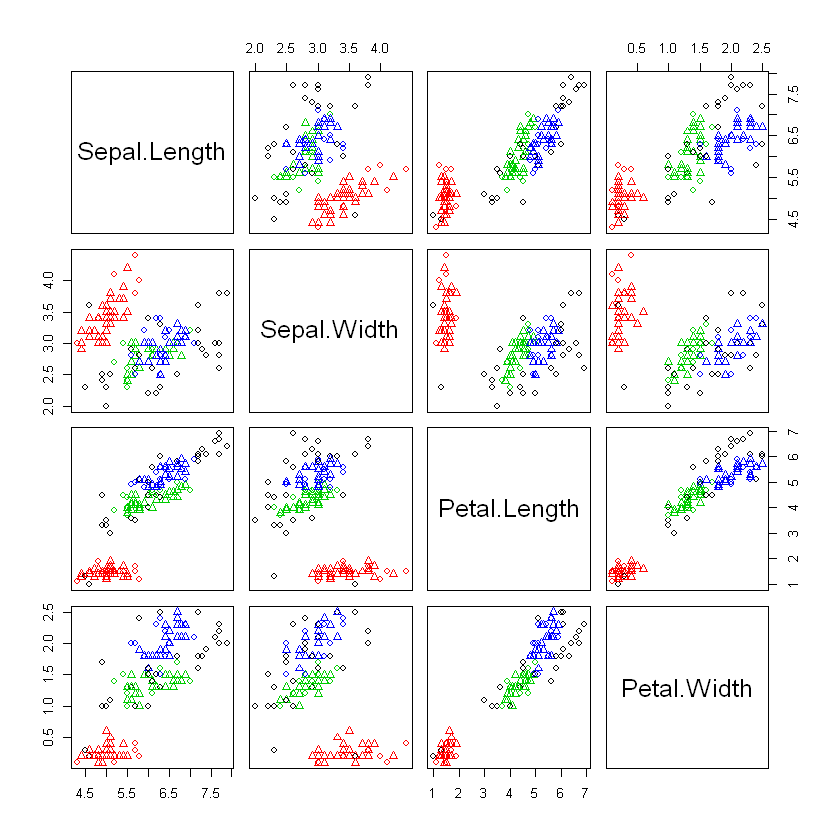

In [19]:
plot(ds,iris2)

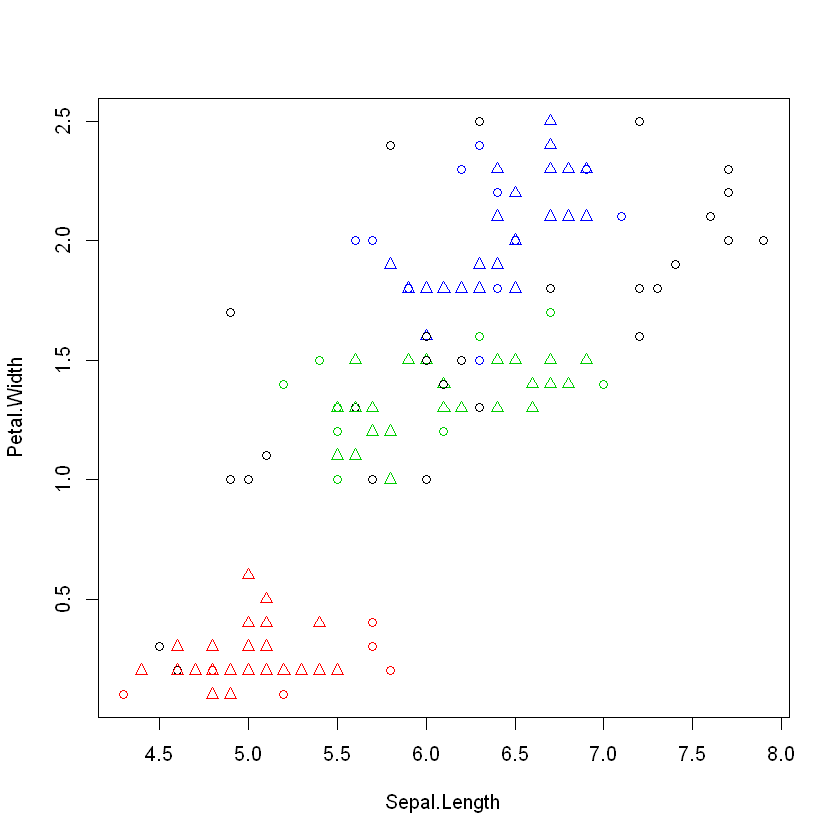

In [20]:
plot(ds,iris2[c(1,4)])